In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')


import numpy as np

import math
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [3]:
df.columns

Index(['Customer_ID', 'Age', 'Location', 'Income_Level', 'Total_Transactions',
       'Avg_Transaction_Value', 'Max_Transaction_Value',
       'Min_Transaction_Value', 'Total_Spent', 'Active_Days',
       'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned', 'Referral_Count',
       'Cashback_Received', 'App_Usage_Frequency', 'Preferred_Payment_Method',
       'Support_Tickets_Raised', 'Issue_Resolution_Time',
       'Customer_Satisfaction_Score', 'LTV'],
      dtype='object')

In [4]:
df.shape

(7000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [6]:
df.isnull().sum()

Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64

In [7]:
df = df.drop('Customer_ID', axis=1)
df

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,68,Suburban,High,340,162.703503,605.997495,80.352666,5.531919e+04,78,20,521,32,654.218655,Monthly,Credit Card,14,3.351374,3,1.244681e+04
6996,62,Suburban,High,647,1575.707877,4702.522747,359.511332,1.019483e+06,271,252,2972,40,3574.857418,Monthly,Wallet Balance,13,19.735330,3,1.131049e+05
6997,16,Urban,Middle,481,14429.355178,17207.737631,1510.598329,6.940520e+06,225,348,2423,8,2899.068571,Monthly,UPI,12,45.036932,2,7.002484e+05
6998,32,Urban,High,574,8005.027184,33203.795716,1976.326124,4.594886e+06,121,50,634,31,2432.363200,Monthly,Credit Card,11,44.145749,1,4.636404e+05


## One Hot Code Encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder


#Selecting the categorical variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# categorical_features


#initializing the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(df[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

one_hot_encoded_complete_ds = pd.concat([df, one_hot_df], axis=1)
one_hot_encoded_complete_ds.drop(categorical_features, axis=1, inplace=True)
one_hot_encoded_complete_ds

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,...,Income_Level_High,Income_Level_Low,Income_Level_Middle,App_Usage_Frequency_Daily,App_Usage_Frequency_Monthly,App_Usage_Frequency_Weekly,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_UPI,Preferred_Payment_Method_Wallet Balance
0,54,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,67,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,44,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,58,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,68,340,162.703503,605.997495,80.352666,5.531919e+04,78,20,521,32,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6996,62,647,1575.707877,4702.522747,359.511332,1.019483e+06,271,252,2972,40,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6997,16,481,14429.355178,17207.737631,1510.598329,6.940520e+06,225,348,2423,8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6998,32,574,8005.027184,33203.795716,1976.326124,4.594886e+06,121,50,634,31,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Basic Statistical Description

In [9]:
one_hot_encoded_complete_ds.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,...,Income_Level_High,Income_Level_Low,Income_Level_Middle,App_Usage_Frequency_Daily,App_Usage_Frequency_Monthly,App_Usage_Frequency_Weekly,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_UPI,Preferred_Payment_Method_Wallet Balance
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,...,0.328286,0.330143,0.341571,0.335143,0.332714,0.332143,0.244571,0.251571,0.255857,0.248000
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,...,0.469623,0.470298,0.474271,0.472074,0.471219,0.471016,0.429864,0.433947,0.436373,0.431883
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizations

### Boxplot

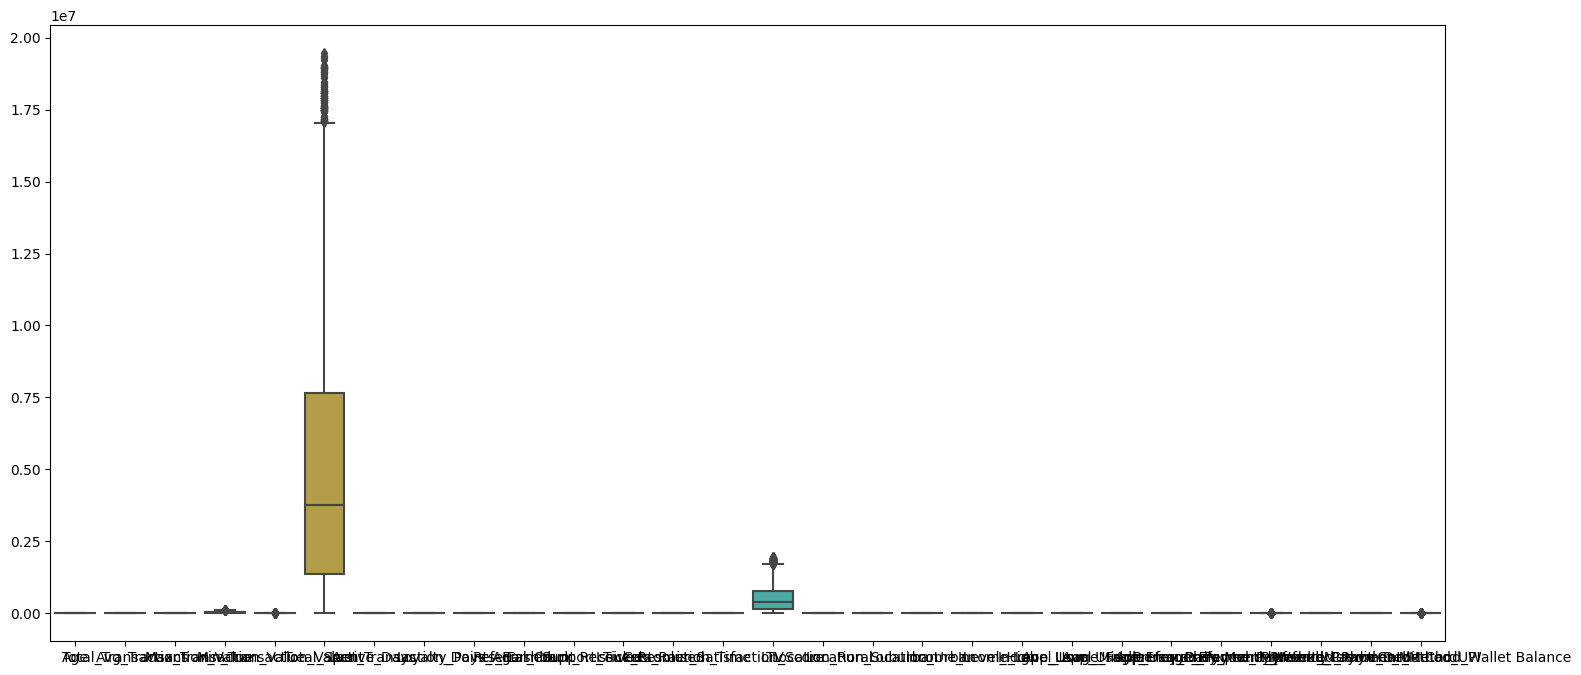

In [10]:
plt.figure(figsize=(18,8))
sns.boxplot(data=one_hot_encoded_complete_ds)
plt.show()

### Scatterplot - LTV VS Independent Variables

In [11]:
one_hot_encoded_complete_ds.columns

Index(['Age', 'Total_Transactions', 'Avg_Transaction_Value',
       'Max_Transaction_Value', 'Min_Transaction_Value', 'Total_Spent',
       'Active_Days', 'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned',
       'Referral_Count', 'Cashback_Received', 'Support_Tickets_Raised',
       'Issue_Resolution_Time', 'Customer_Satisfaction_Score', 'LTV',
       'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Income_Level_High', 'Income_Level_Low', 'Income_Level_Middle',
       'App_Usage_Frequency_Daily', 'App_Usage_Frequency_Monthly',
       'App_Usage_Frequency_Weekly', 'Preferred_Payment_Method_Credit Card',
       'Preferred_Payment_Method_Debit Card', 'Preferred_Payment_Method_UPI',
       'Preferred_Payment_Method_Wallet Balance'],
      dtype='object')

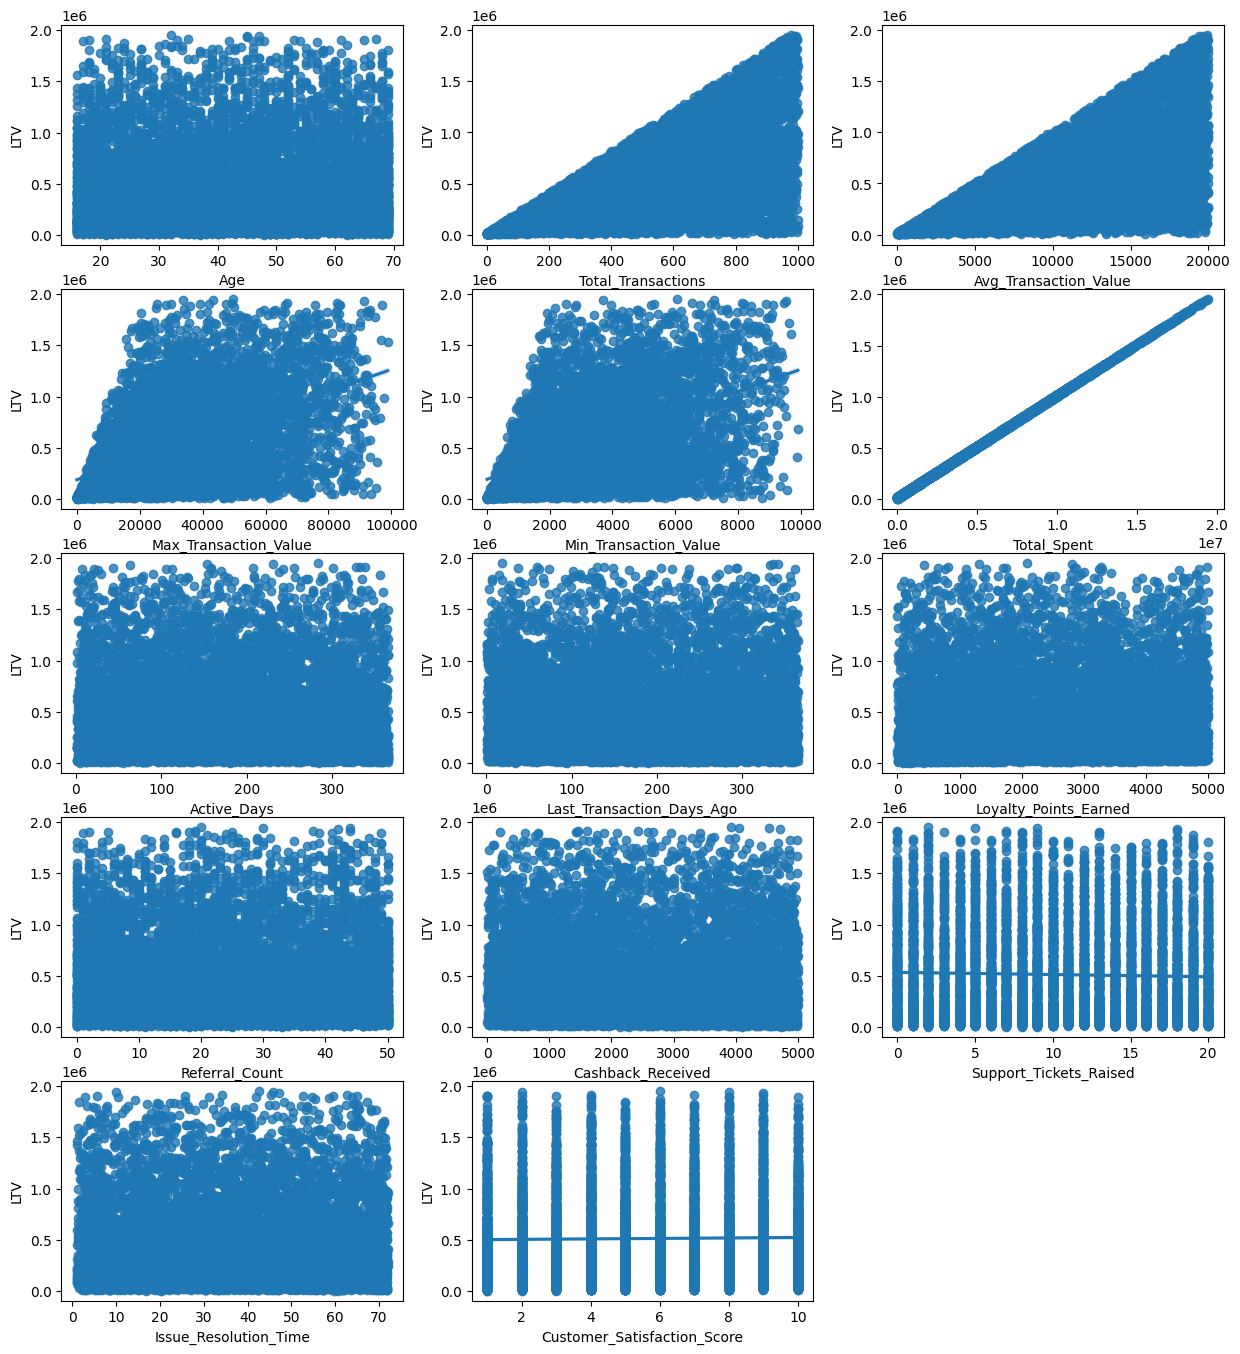

In [12]:
# Assuming df is your DataFrame
n_features = len([col for col in df.columns if col != 'LTV'])

# Calculating the number of rows and columns
n_cols = 3 
n_rows = math.ceil(n_features / n_cols)


plt.figure(figsize=(15,20))

count=1
for feature in df.loc[:, ~df.columns.isin(categorical_features)].columns:
    if feature == 'LTV':
        continue
    plt.subplot(n_rows,n_cols, count)
    ax = sns.regplot(x=df[feature], y=df.LTV)
    ax.set_xlabel(feature)
    ax.set_ylabel('LTV')
    count += 1

### Defining X (independent variables) and y (dependent variable)

In [13]:
X = one_hot_encoded_complete_ds.drop('LTV', axis=1).to_numpy()
y = one_hot_encoded_complete_ds['LTV'].to_numpy()

### Creating Train and Test datasets

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=7)
train_X

array([[4.10000000e+01, 3.50000000e+01, 5.67899941e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 2.34000000e+02, 1.09794458e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.50000000e+01, 1.85000000e+02, 2.91182253e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.30000000e+01, 1.25000000e+02, 7.36958864e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.70000000e+01, 3.80000000e+02, 1.02087433e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.90000000e+01, 9.00000000e+00, 1.80468828e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

### Scaling the data

In [15]:
sc = StandardScaler()
train2_X = sc.fit_transform(train_X)
test2_X = sc.transform(test_X)

## 1) Performing the Linear Regression

In [16]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(train2_X, train_y)

LinearRegression(n_jobs=-1)

In [17]:
#Making predictions
lr_predictions = lr_model.predict(test2_X)

### Model Evaluations

In [18]:
def displays_model_evaluations(model_name, model_predictions, test_y):
    
    def _model_intercept():
        try: 
            i = model_name.intercept_
        # except TypeError as t:
        #     print("Some error encountered in model intercept value")
        #     return None
        except Exception as e:
            print(f"Some error encountered in model intercept value. Error details - {e}")
            return None
        else:
            return np.round(model_name.intercept_, 2)
        
        
    print("####################################################")
    print("############# Model Evaluation Report ##############")
    print("####################################################")
    
    df1 = pd.DataFrame({
        'Evaluation name': [
            'Intercept', 
            'R2',
            'Adjusted R2',
            'Mean Absolute Error (MAE)',
            'Mean Square Error (MSE)',
            'Root Mean Squared Error (RMSE)',
        ],
        'Values': [
            _model_intercept(),
            round(metrics.r2_score(test_y, model_predictions), 2), 
            round(1-(1-metrics.r2_score(test_y, model_predictions)) * (len(y)-1)/(len(y)-X.shape[1]-1),2),
            round(metrics.mean_absolute_error(test_y, model_predictions),2),
            round(metrics.mean_squared_error(test_y, model_predictions),2),
            round(np.sqrt(metrics.mean_squared_error(test_y, model_predictions)),2),
        ]
    })
    return df1

displays_model_evaluations(lr_model, lr_predictions, test_y)

####################################################
############# Model Evaluation Report ##############
####################################################


,Evaluation name,Values
0,Intercept,512911.93
1,R2,1.00
2,Adjusted R2,1.00
3,Mean Absolute Error (MAE),0.00
4,Mean Square Error (MSE),0.00
5,Root Mean Squared Error (RMSE),0.00


### Forecast Table

In [19]:
print("####################################################")
print("################ Forecast Table ####################")
print("####################################################")

predicted = lr_predictions.T
diff = predicted - test_y
forecasted_table = pd.DataFrame({'Actual': test_y.round(3), 'Predicted':predicted.round(3), 'Difference': diff.round(3)})
forecasted_table.head()

####################################################
################ Forecast Table ####################
####################################################


,Actual,Predicted,Difference
0,84409.898,84409.898,0.0
1,552128.420,552128.420,0.0
2,167932.091,167932.091,0.0
3,1105459.483,1105459.483,-0.0
4,580577.270,580577.270,0.0


In [20]:
lr_predictions = lr_model.predict(test2_X)

In [21]:
test2_X[0]

array([ 1.2438648 ,  0.80931716, -1.5582584 , -1.2637013 , -1.18027223,
       -0.98229073,  0.80412351,  1.44924841,  1.36116586, -0.68314372,
       -0.01717371, -1.32421787, -0.8764871 ,  0.53167805,  1.41858107,
       -0.70464596, -0.7117523 , -0.69191262, -0.70152664,  1.37353483,
        1.41858107, -0.71460165, -0.70181003, -0.57350122, -0.58257402,
       -0.57790013,  1.73784364])

In [22]:
test_X

array([[6.20000000e+01, 7.33000000e+02, 9.30215293e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.10000000e+01, 8.83000000e+02, 6.13571943e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.10000000e+01, 4.61000000e+02, 3.25121616e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.90000000e+01, 1.00000000e+01, 1.81624073e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.80000000e+01, 6.29000000e+02, 5.90039576e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.80000000e+01, 1.62000000e+02, 7.47285056e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## 2) Gradient Boosting Regressor

In [23]:
# Initialize and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(train2_X, train_y)

GradientBoostingRegressor(random_state=42)

In [24]:
# Make predictions
gbr_predictions = gbr_model.predict(test2_X)

In [25]:
displays_model_evaluations(gbr_model, gbr_predictions, test_y)

####################################################
############# Model Evaluation Report ##############
####################################################
Some error encountered in model intercept value. Error details - 'GradientBoostingRegressor' object has no attribute 'intercept_'


,Evaluation name,Values
0,Intercept,NaN
1,R2,1.00
2,Adjusted R2,1.00
3,Mean Absolute Error (MAE),3010.79
4,Mean Square Error (MSE),15911170.01
5,Root Mean Squared Error (RMSE),3988.88


## 3) Support Vector Regression

In [26]:
#Initializing and train SVR
svr_lin_model = SVR(kernel="linear", C=100, gamma="auto")
svr_lin_model.fit(train2_X, train_y)

SVR(C=100, gamma='auto', kernel='linear')

In [27]:
# Make predictions
svr_lin_predictions = svr_lin_model.predict(test2_X)

In [28]:
#Model evaluation
displays_model_evaluations(svr_lin_model, svr_lin_predictions, test_y)

####################################################
############# Model Evaluation Report ##############
####################################################


,Evaluation name,Values
0,Intercept,[508277.31]
1,R2,0.97
2,Adjusted R2,0.97
3,Mean Absolute Error (MAE),57442.28
4,Mean Square Error (MSE),6040755777.05
5,Root Mean Squared Error (RMSE),77722.3
